In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
sns.set()
sns.set_palette("colorblind")

In [2]:
logdir = Path('/data/logs/2018-03-23-1725-partcontrol-bigmodel/')
logdir = Path('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/')
list(logdir.glob('*/*'))

[PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_lim/run_1'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_lim/run_2'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_lim/run_3'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_1'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_2'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim_vara/run_3'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim/run_1'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim/run_2'),
 PosixPath('/data/logs/2018-03-27-1646-partcontrol-bigmodel-nototmean/bigmodel_mlp_nolim/run_3')]

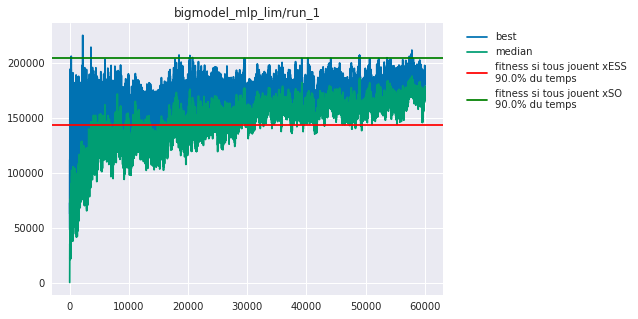

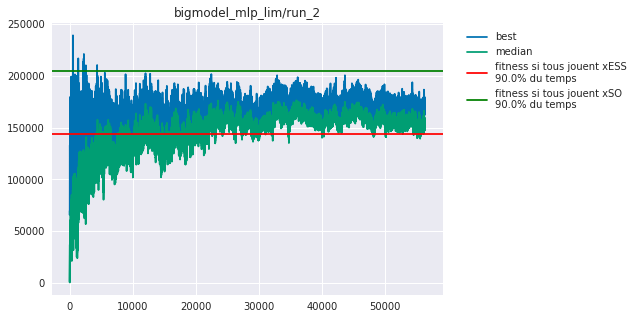

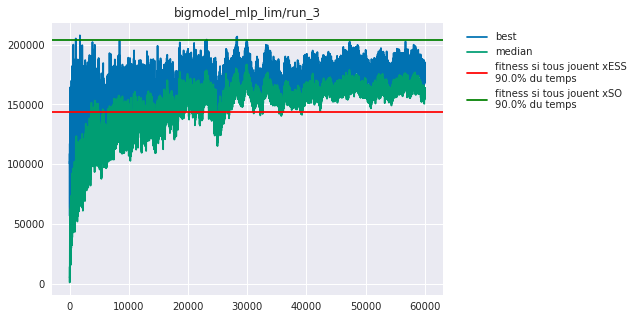

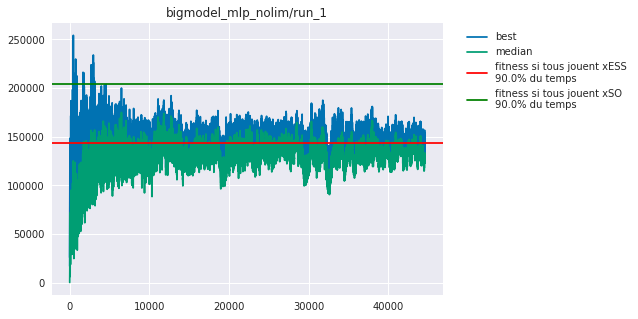

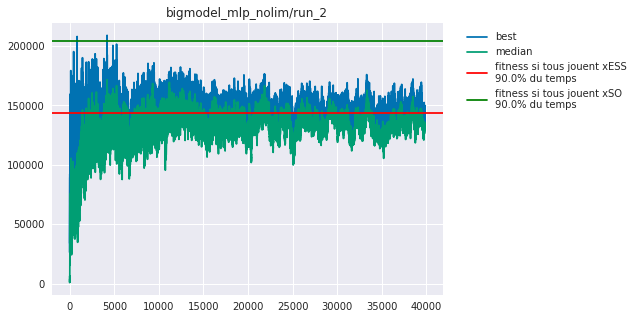

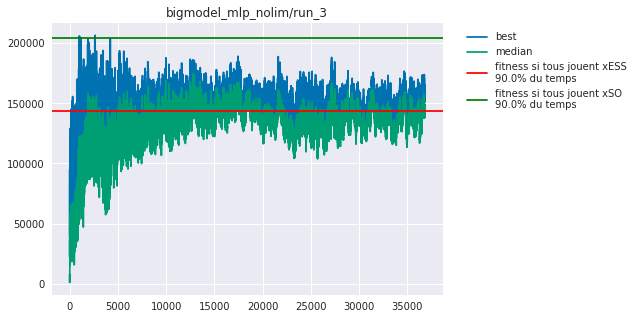

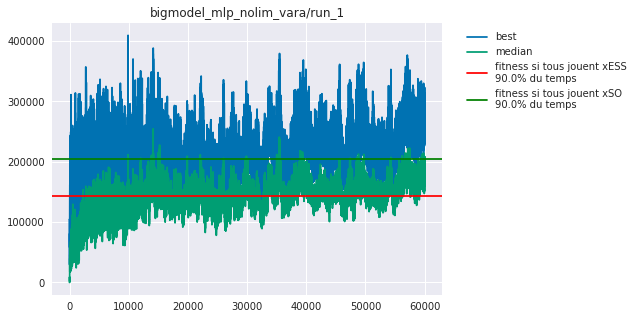

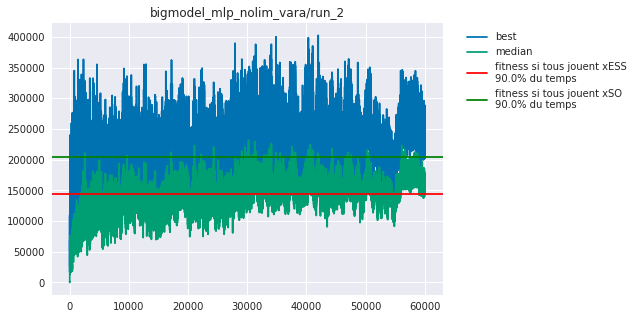

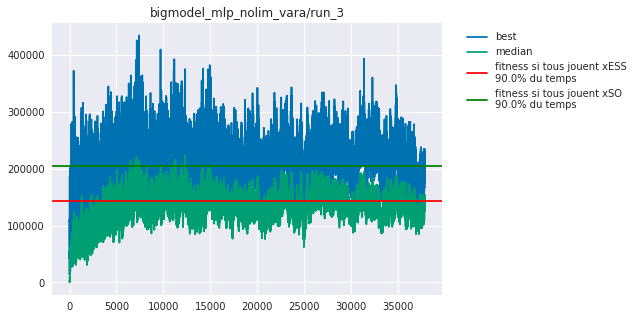

In [3]:
def p(x, x0, a, b, n=2):
    return (a * (x + (n-1) * x0) + b * (n - 1) * x0) / n - 1/2 * x**2

rsize = 1


cond = 'big' # bigmodel_ab_new


for path in sorted(list(logdir.glob('{}*/*/'.format(cond)))):
    dat = np.loadtxt(path / 'fit.dat', comments=["%", "#"])
    df = pd.DataFrame(data=dat, columns="iteration,evaluation,sigma,axisratio,bestever,best,median,worst".split(","))
    df[['best', 'median', 'worst']] = -df[['best', 'median', 'worst']]
    df[['best', 'median']].plot(figsize=(7, 5))
    if cond.startswith('big'):
        nbrep = 3
        nbeval = 1
        a = 5
        b = 1
        n = 2
        percent = 0.90
        xess = a/n
        xso = a + (n - 1)/n * b
        plt.axhline(5000*p(xess, xess, a, b)*percent*nbrep*nbeval, color="r", label=f"fitness si tous jouent xESS\n{percent*100}% du temps")
        plt.axhline(5000*p(xso, xso, a, b)*percent*nbrep*nbeval, color="g", label=f"fitness si tous jouent xSO\n{percent*100}% du temps")
    if cond.startswith('correp'):
        plt.axhline(2500*1*0.80, color="g", label="2")
        plt.axhline(2500*0.5*0.80, color="r", label="1 ou 3")
    plt.title("{}/{}".format(path.parent.name, path.name))
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show();